In [1]:
# Widen width of notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

lenders = pd.read_csv('lenders.csv')
loan_lenders = pd.read_csv('loans_lenders.csv')
loans = pd.read_csv('loans.csv')
print("lenders: ", lenders.shape)
print("loan_lenders: ", loan_lenders.shape)
print("loans: ", loans.shape)

lenders:  (1551190, 14)
loan_lenders:  (1998477, 2)
loans:  (2053528, 34)


In [2]:
#compute funding rate & funding status
loans['funding_rate'] = loans['FUNDED_AMOUNT']/loans['LOAN_AMOUNT']

loans['funding_status'] = loans['funding_rate']
loans.loc[loans['funding_rate'] < 1, 'funding_status'] = 0
loans.loc[loans['funding_rate'] >= 1, 'funding_status'] = 1

loans.head(5)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,PARTNER_ID,POSTED_TIME,PLANNED_EXPIRATION_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,funding_rate,funding_status
0,1873913,Celesti,English,Celesti is a married woman with four children....,Celesti is a married woman with four children....,500.0,500.0,funded,3305762.0,NaN,Food,Food,to buy ingredients for her food production bus...,PH,Philippines,"Guindulman, Bohol",standard,NaN,PHP,145.0,2019-11-12 03:20:43.000 +0000,2020-01-31 18:10:25.000 +0000,2019-10-17 07:00:00.000 +0000,2019-12-18 06:30:52.000 +0000,8.0,16,1,1,NaN,Celesti,female,true,monthly,field_partner,1.000000,1.0
1,1525832,Teofreda,English,Teofreda is a hardworking entrepreneur who has...,Teofreda is a hardworking entrepreneur who has...,400.0,400.0,funded,2493004.0,NaN,Fruits & Vegetables,Food,to buy fruit to sell in her food stall.,PH,Philippines,"Canlaon, Negros Oriental",shared,0.1,PHP,145.0,2018-05-10 07:19:23.000 +0000,2018-06-13 13:50:06.000 +0000,2018-04-13 07:00:00.000 +0000,2018-05-15 03:50:19.000 +0000,11.0,13,2,1,#Repeat Borrower,Teofreda,female,true,monthly,field_partner,1.000000,1.0
2,1922237,Freda Mae,English,Freda wants to thank her Kiva lenders for thei...,Freda wants to thank her Kiva lenders for thei...,1450.0,1450.0,funded,3374140.0,NaN,Property,Housing,"to buy copper, Masonite, and cement for her re...",SB,Solomon Islands,Honiara,standard,NaN,SBD,411.0,2020-02-04 00:39:27.000 +0000,2020-03-20 07:50:11.000 +0000,2020-01-30 08:00:00.000 +0000,2020-02-26 04:15:00.000 +0000,15.0,56,1,1,"user_favorite, #Woman-Owned Business, user_fav...",Freda Mae,female,true,monthly,field_partner,1.000000,1.0
3,1761599,Robert,English,Robert is a 45-year-old married male with four...,Robert is a 45-year-old married male with four...,75.0,875.0,expired,3153024.0,NaN,Personal Housing Expenses,Housing,"to buy sand, cement and paint to renovate his ...",UG,Uganda,Kasese,shared,0.1,UGX,163.0,2019-05-14 06:53:55.000 +0000,2019-06-17 13:10:06.000 +0000,2019-05-13 07:00:00.000 +0000,NaN,41.0,3,1,1,"#Vegan, #Schooling, #Repair Renew Replace, #Pa...",Robert,male,true,irregular,field_partner,0.085714,0.0
4,337167,Msembi,English,Msembi is a 37-year-old married father of two ...,NaN,225.0,225.0,funded,873111.0,NaN,Fruits & Vegetables,Food,to purchase more vegetables and fruits,KE,Kenya,Voi,shared,0.2,KES,133.0,2011-09-16 08:39:06.000 +0000,NaN,2011-08-31 07:00:00.000 +0000,2011-09-27 17:13:29.000 +0000,14.0,7,1,1,NaN,Msembi,male,true,irregular,field_partner,1.000000,1.0


In [3]:
# #amount matter? --> over-request
loans[['funding_status','FUNDED_AMOUNT','LOAN_AMOUNT']].groupby('funding_status').mean()

,FUNDED_AMOUNT,LOAN_AMOUNT
funding_status,,
0.0,577.360471,1425.135122
1.0,785.429947,785.429716


In [4]:
# join loan dataset with lender
df = pd.merge(loans, loan_lenders, on='LOAN_ID')

In [5]:
# get number of lender per loan
df['number_lender'] = df['LENDERS'].str.split(',').apply(len)

# get the length of loan description and loan_use
df['len_des'] = df.DESCRIPTION.str.len()
df['len_loan_use'] = df.LOAN_USE.str.len()

# get the length of tag
df['TAGS'] = df['TAGS'].fillna(' ')
df['nb_tag'] = df.TAGS.str.split('#').apply(len)

In [6]:
# #amount matter? --> over-request
df[['funding_status','FUNDED_AMOUNT','LOAN_AMOUNT']].groupby('funding_status').mean()

,FUNDED_AMOUNT,LOAN_AMOUNT
funding_status,,
0.0,611.949532,1397.762175
1.0,794.361770,794.361533


In [7]:
df['FUNDED_AMOUNT'] = df['FUNDED_AMOUNT'].fillna(0)
df['LOAN_AMOUNT'] = df['LOAN_AMOUNT'].fillna(0)
df_amt = df[(df['FUNDED_AMOUNT']>=0)&(df['FUNDED_AMOUNT']<3500)&(df['LOAN_AMOUNT']<3500)]

<ipython-input-8-220b5c53605e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  s1.set_xticklabels(s1.get_xticks(), size = 15)


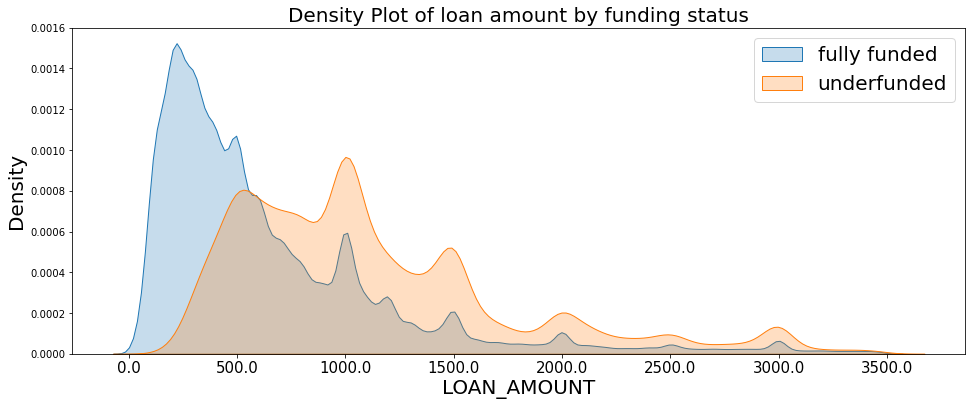

In [8]:
# Loan amount distribution by funding status
plt.figure(figsize = (16, 6))
s1=sns.kdeplot(df_amt.loc[df_amt['funding_status'] == 1, 'LOAN_AMOUNT'], label = 'fully funded', shade = True)
s2=sns.kdeplot(df_amt.loc[df_amt['funding_status'] == 0, 'LOAN_AMOUNT'], label = 'underfunded', shade = True)

plt.xlabel('LOAN_AMOUNT', fontsize=20); plt.ylabel('Density', fontsize=20)
s1.set_xticklabels(s1.get_xticks(), size = 15)

plt.title('Density Plot of loan amount by funding status', fontsize=20)
plt.legend(frameon=True, fontsize=20)

Text(0.5, 1.0, 'underfunded')

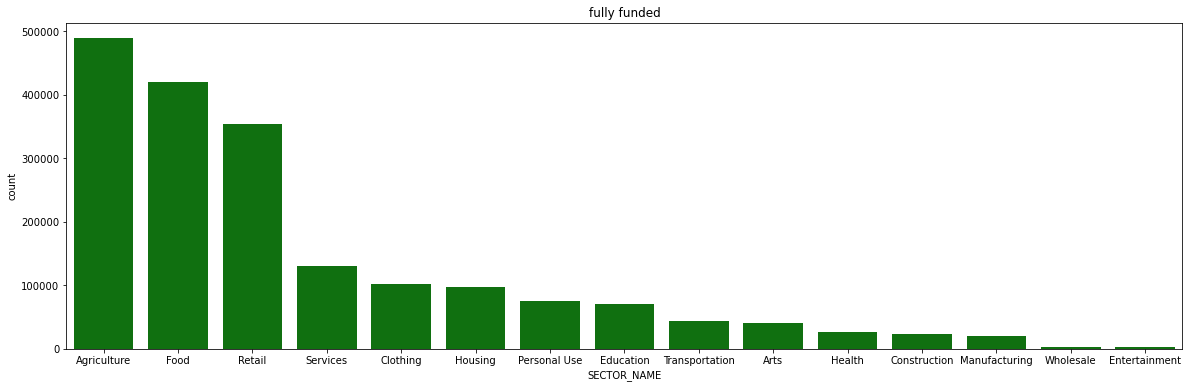

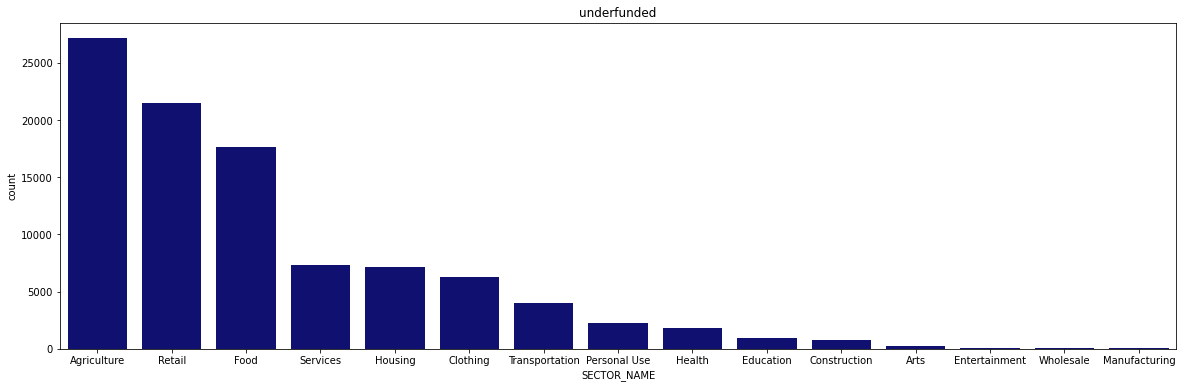

In [9]:
plt.figure(figsize = (20, 6))
sns.countplot(x="SECTOR_NAME", data=df[df['funding_status']==1], color = 'green', order=pd.value_counts(df[df['funding_status']==1]['SECTOR_NAME']).iloc[:15].index)
plt.title('fully funded')

plt.figure(figsize = (20, 6))
sns.countplot(x="SECTOR_NAME", data=df[df['funding_status']==0], color = 'navy', order=pd.value_counts(df[df['funding_status']==0]['SECTOR_NAME']).iloc[:15].index)
plt.title('underfunded')

Text(0.5, 1.0, 'underfunded')

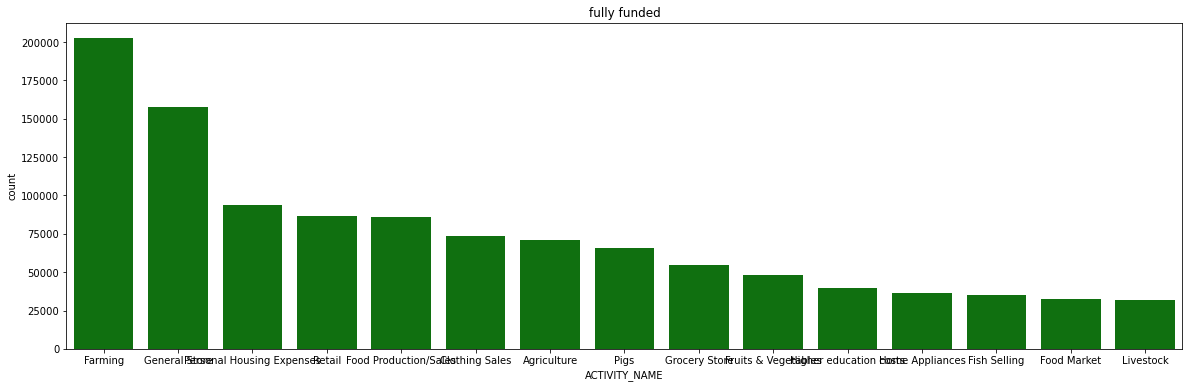

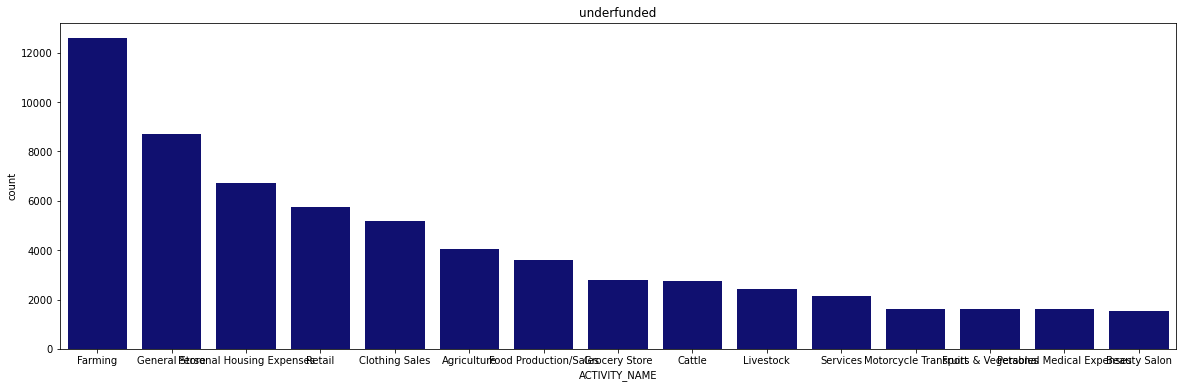

In [46]:
plt.figure(figsize = (20, 6))
sns.countplot(x="ACTIVITY_NAME", data=df[df['funding_status']==1], color = 'green', order=pd.value_counts(df[df['funding_status']==1]['ACTIVITY_NAME']).iloc[:15].index)
plt.title('fully funded')

plt.figure(figsize = (20, 6))
sns.countplot(x="ACTIVITY_NAME", data=df[df['funding_status']==0], color = 'navy', order=pd.value_counts(df[df['funding_status']==0]['ACTIVITY_NAME']).iloc[:15].index)
plt.title('underfunded')

Text(0.5, 1.0, 'underfunded')

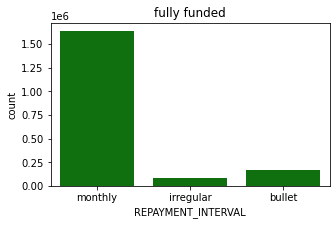

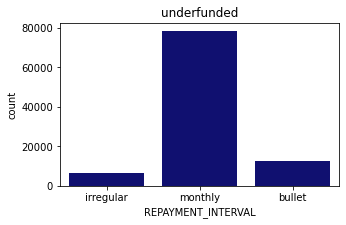

In [47]:
plt.figure(figsize = (5, 3))
sns.countplot(x="REPAYMENT_INTERVAL", data=df[df['funding_status']==1], color = 'green')
plt.title('fully funded')

plt.figure(figsize = (5, 3))
sns.countplot(x="REPAYMENT_INTERVAL", data=df[df['funding_status']==0], color = 'navy')
plt.title('underfunded')

In [48]:
# convert to date time
date = ['POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME','RAISED_TIME']

for i in date:
    df[i] =  pd.to_datetime(df[i])

In [49]:
# compute duration of post & convert to day count
df['post_dur'] = df.PLANNED_EXPIRATION_TIME - df.POSTED_TIME
df['post_dur'] = df['post_dur'] / np.timedelta64(1, 'D')

# compute duration required to raise loan & convert to day count
df['raise_dur'] = df.RAISED_TIME - df.POSTED_TIME
df['raise_dur'] = df['raise_dur'] / np.timedelta64(1, 'D')

In [50]:
# filter raise duration smaller than 0 which is not reasonable
df['post_dur'] = df['post_dur'].fillna(0)
df['raise_dur'] = df['raise_dur'].fillna(0)
df_dur = df[(df['raise_dur']>=0)&(df['raise_dur']<60)&(df['post_dur']<60)]

C:\Users\DHE00\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHE00\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'underfunded')

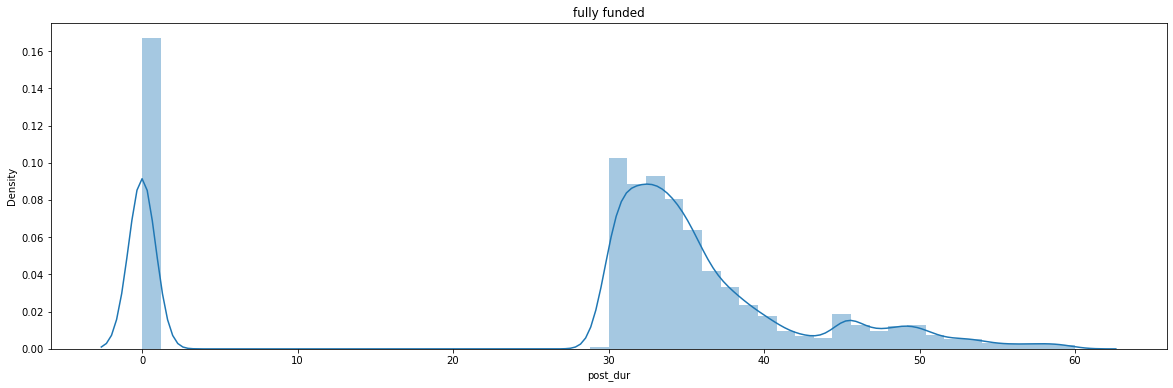

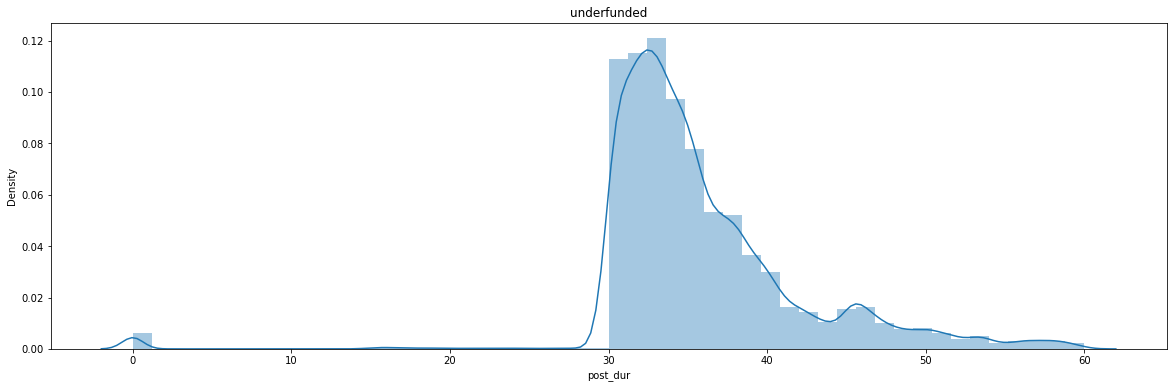

In [51]:
plt.figure(figsize = (20, 6))
sns.distplot(df_dur[df_dur['funding_status']==1]['post_dur'])
plt.title('fully funded')

plt.figure(figsize = (20, 6))
sns.distplot(df_dur[df_dur['funding_status']==0]['post_dur'])
plt.title('underfunded')

C:\Users\DHE00\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHE00\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'underfunded')

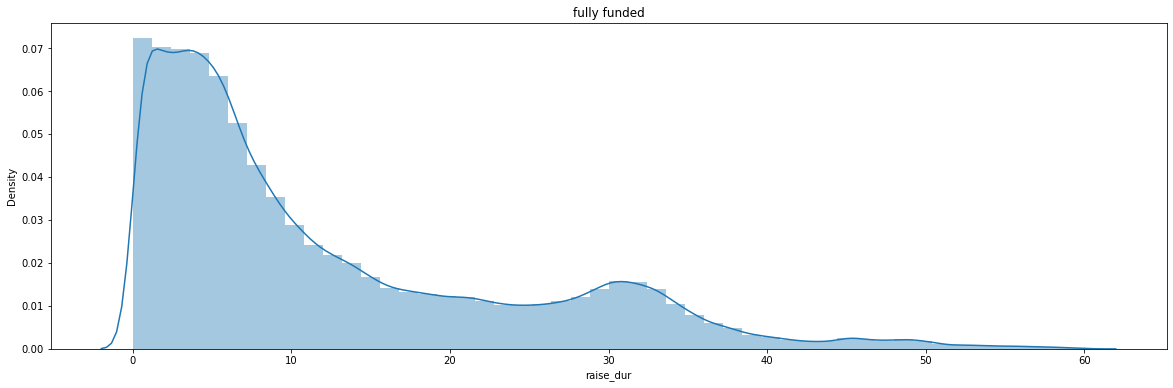

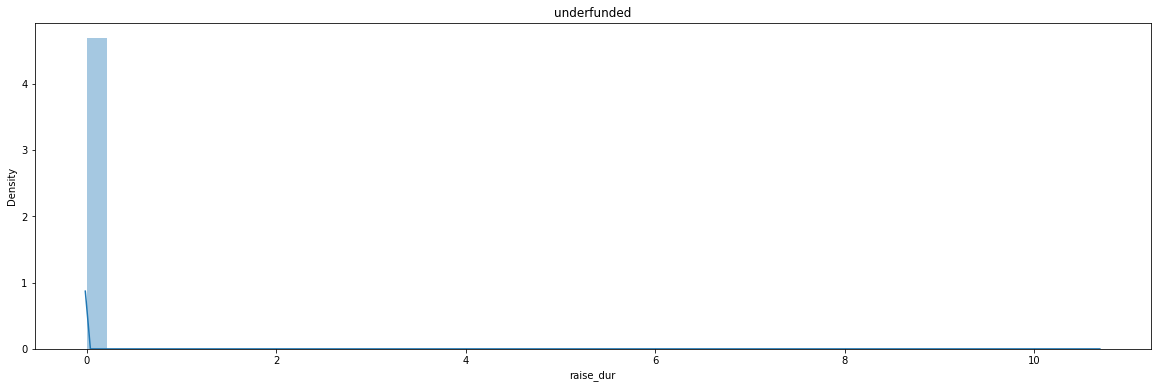

In [52]:
plt.figure(figsize = (20, 6))
sns.distplot(df_dur[df_dur['funding_status']==1]['raise_dur'])
plt.title('fully funded')

plt.figure(figsize = (20, 6))
sns.distplot(df_dur[df_dur['funding_status']==0]['raise_dur'])
plt.title('underfunded')

In [53]:
# top countries
df['COUNTRY_NAME'].value_counts()[:6].index.tolist()

['Philippines', 'Kenya', 'Cambodia', 'Peru', 'El Salvador', 'Uganda']

Text(0.5, 1.0, 'underfunded')

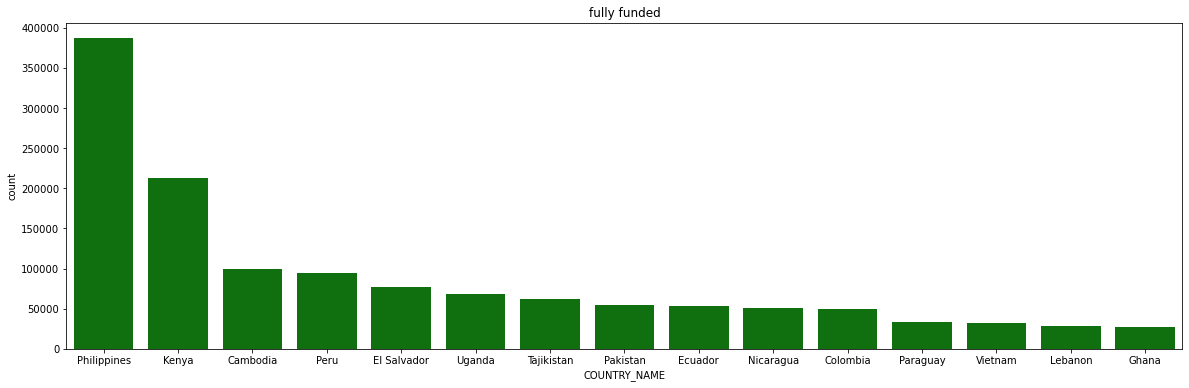

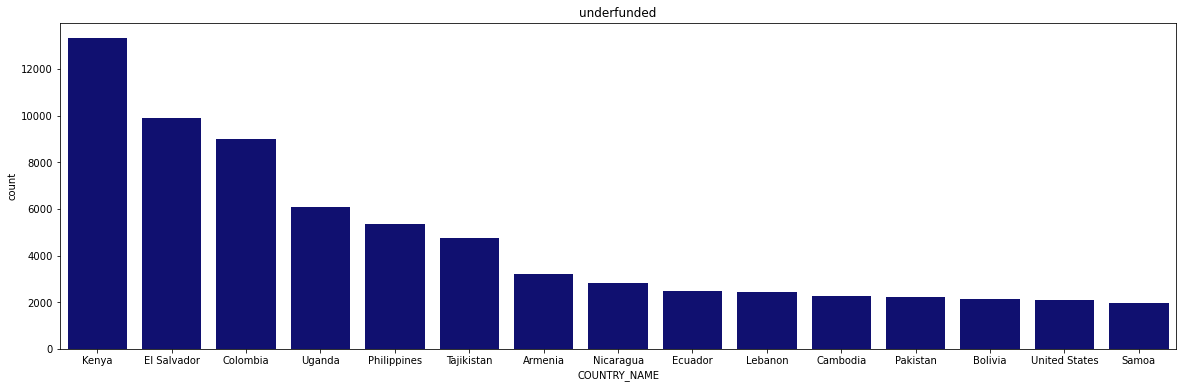

In [54]:
plt.figure(figsize = (20, 6))
sns.countplot(x="COUNTRY_NAME", data=df[df['funding_status']==1], color = 'green', order=pd.value_counts(df[df['funding_status']==1]['COUNTRY_NAME']).iloc[:15].index)
plt.title('fully funded')

plt.figure(figsize = (20, 6))
sns.countplot(x="COUNTRY_NAME", data=df[df['funding_status']==0], color = 'navy', order=pd.value_counts(df[df['funding_status']==0]['COUNTRY_NAME']).iloc[:15].index)
plt.title('underfunded')

In [7]:
# length matter? --> too long
df[['funding_status','len_des','len_loan_use','nb_tag']].groupby('funding_status').mean()

,len_des,len_loan_use,nb_tag
funding_status,,,
0.0,729.970643,66.157970,3.161717
1.0,730.567728,58.657774,2.226129


In [8]:
# length matter? --> too long
df[['funding_status','len_des','len_loan_use','nb_tag']].groupby('funding_status').median()

,len_des,len_loan_use,nb_tag
funding_status,,,
0.0,678.0,61.0,3
1.0,642.0,52.0,1


Text(0.5, 1.0, 'loan description length by activity')

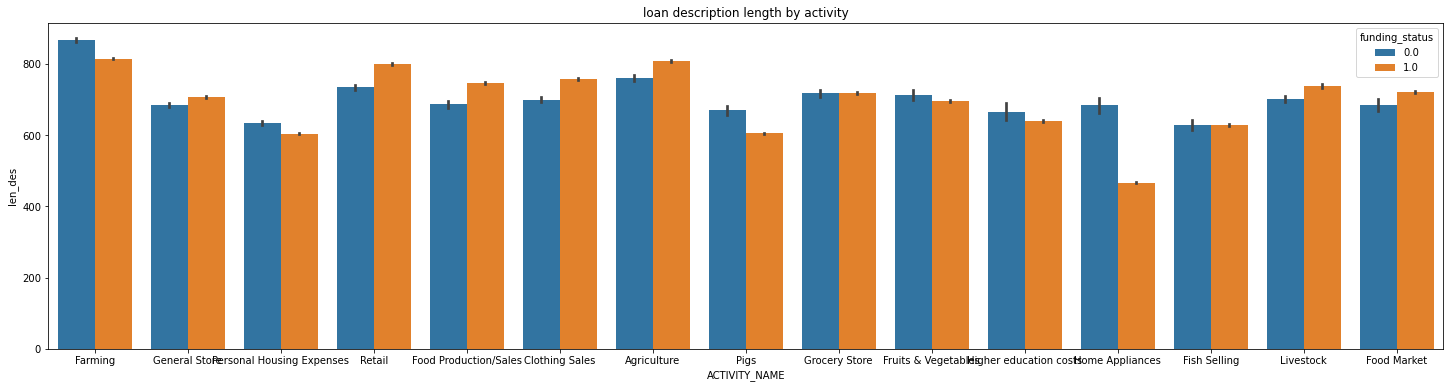

In [56]:
plt.figure(figsize = (25, 6))
sns.barplot(x="ACTIVITY_NAME", y="len_des", data=df, hue='funding_status', order=pd.value_counts(df['ACTIVITY_NAME']).iloc[:15].index)
plt.title('loan description length by activity')

Text(0.5, 1.0, 'loan use description length by activity')

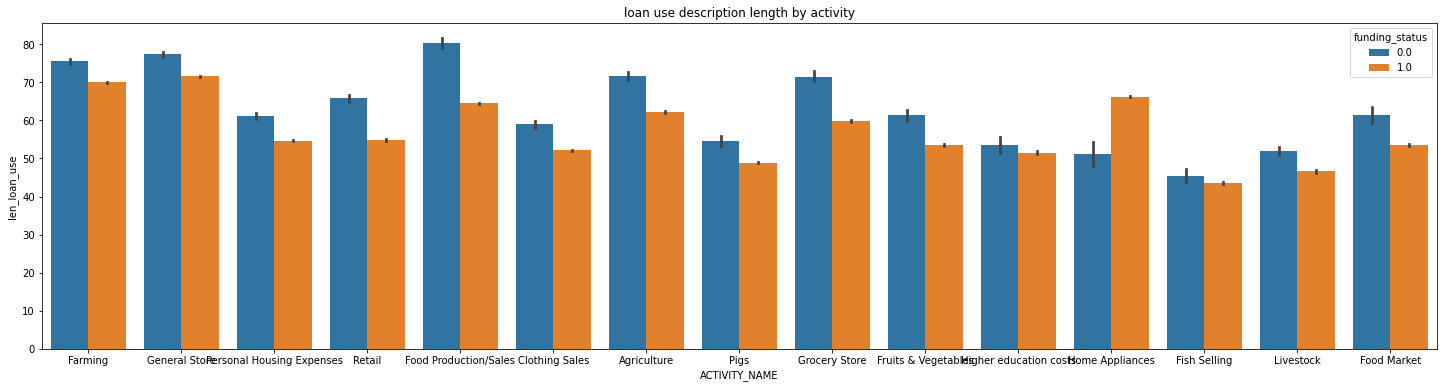

In [57]:
plt.figure(figsize = (25, 6))
sns.barplot(x="ACTIVITY_NAME", y="len_loan_use", data=df, hue='funding_status', order=pd.value_counts(df['ACTIVITY_NAME']).iloc[:15].index)
plt.title('loan use description length by activity')

Text(0.5, 1.0, 'number of tag by activity')

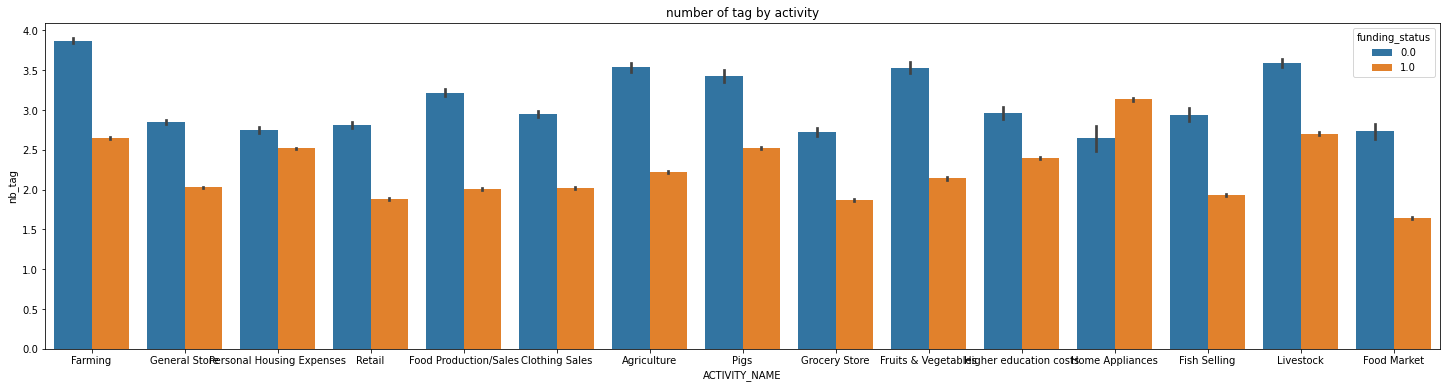

In [58]:
plt.figure(figsize = (25, 6))
sns.barplot(x="ACTIVITY_NAME", y="nb_tag", data=df, hue='funding_status', order=pd.value_counts(df['ACTIVITY_NAME']).iloc[:15].index)
plt.title('number of tag by activity')

Text(0.5, 1.0, 'loan description length by sector')

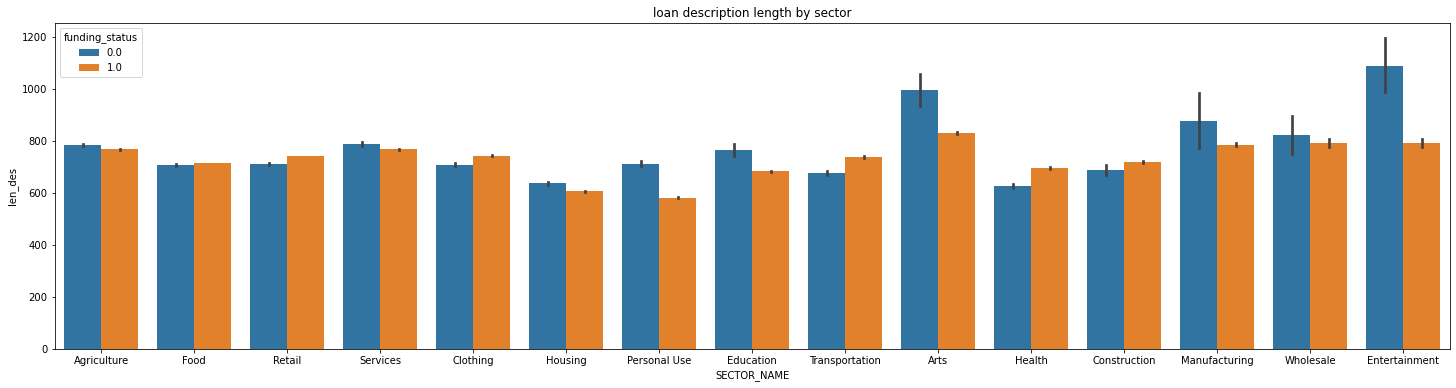

In [59]:
plt.figure(figsize = (25, 6))
sns.barplot(x="SECTOR_NAME", y="len_des", data=df, hue='funding_status', order=pd.value_counts(df['SECTOR_NAME']).iloc[:15].index)
plt.title('loan description length by sector')

Text(0.5, 1.0, 'loan use description length by sector')

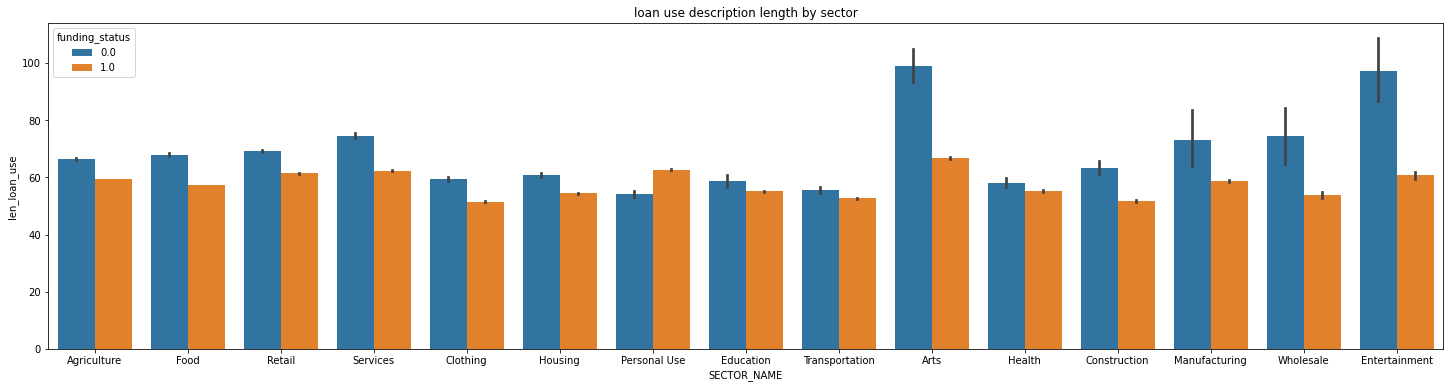

In [60]:
plt.figure(figsize = (25, 6))
sns.barplot(x="SECTOR_NAME", y="len_loan_use", data=df, hue='funding_status', order=pd.value_counts(df['SECTOR_NAME']).iloc[:15].index)
plt.title('loan use description length by sector')

Text(0.5, 1.0, 'number of tag by sector')

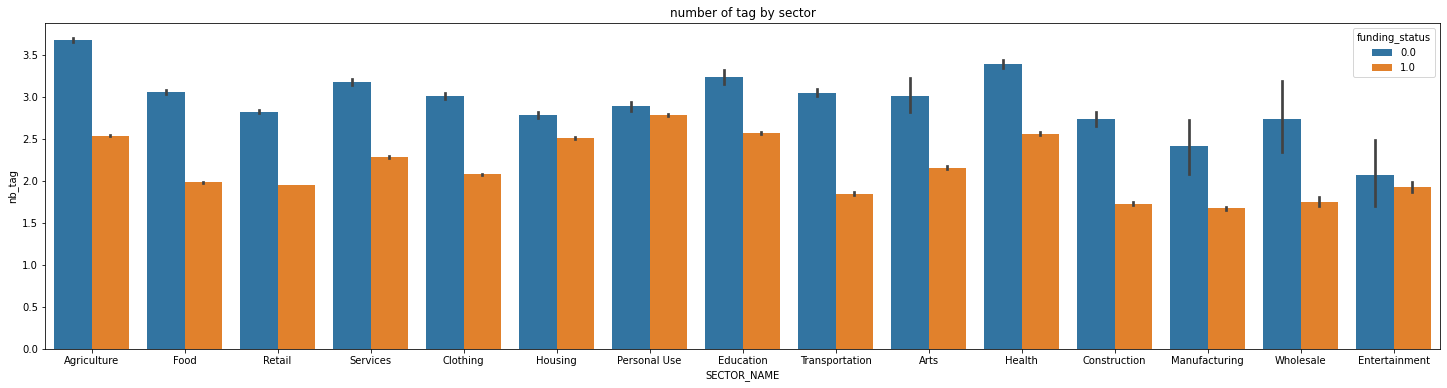

In [61]:
plt.figure(figsize = (25, 6))
sns.barplot(x="SECTOR_NAME", y="nb_tag", data=df, hue='funding_status', order=pd.value_counts(df['SECTOR_NAME']).iloc[:15].index)
plt.title('number of tag by sector')

## periods?

In [10]:
df['year_disburse'] = pd.DatetimeIndex(df['DISBURSE_TIME']).year

Text(0.5, 1.0, 'funding rate by year')

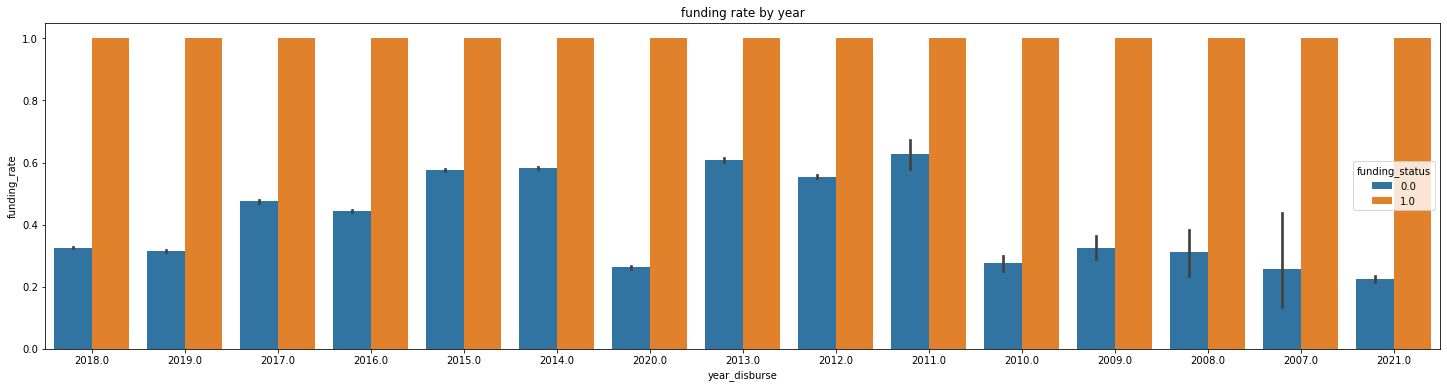

In [63]:
plt.figure(figsize = (25, 6))
sns.barplot(x="year_disburse", y="funding_rate", data=df, hue='funding_status', order=pd.value_counts(df['year_disburse']).iloc[:15].index)
plt.title('funding rate by year')

In [64]:
yr_sta = df.groupby(['year_disburse', 'funding_status']).agg({'LOAN_ID': 'count'})
yr = df.groupby(['year_disburse']).agg({'LOAN_ID': 'count'})
yr_sta_penc = yr_sta.div(yr, level='year_disburse') * 100

In [65]:
yr_sta_penc_fill = yr_sta_penc.add_suffix('_').reset_index()
yr_sta_fill = yr_sta.add_suffix('_').reset_index()

<AxesSubplot:xlabel='year_disburse', ylabel='LOAN_ID_'>

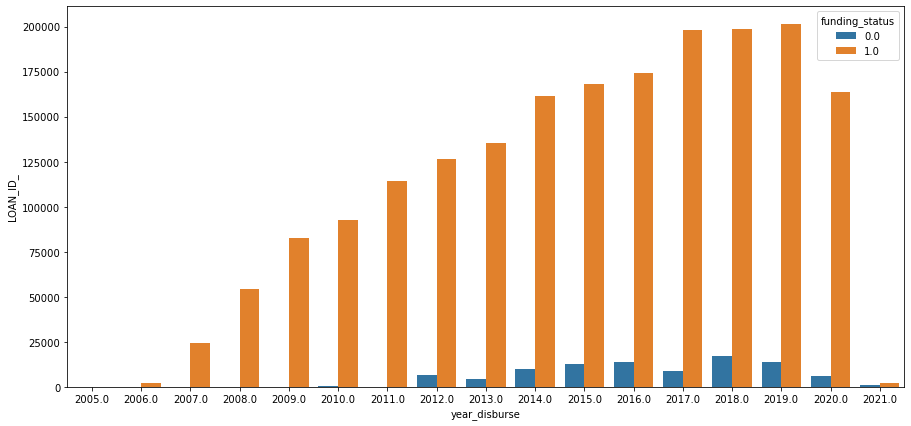

In [66]:
fig, ax1 = plt.subplots(figsize=(15,7))
# ax2 = ax1.twinx()  # set up the 2nd axis
sns.barplot(x='year_disburse', y ='LOAN_ID_', data=yr_sta_fill, hue='funding_status')
#take out 2020 loans that is not expired, status=expired

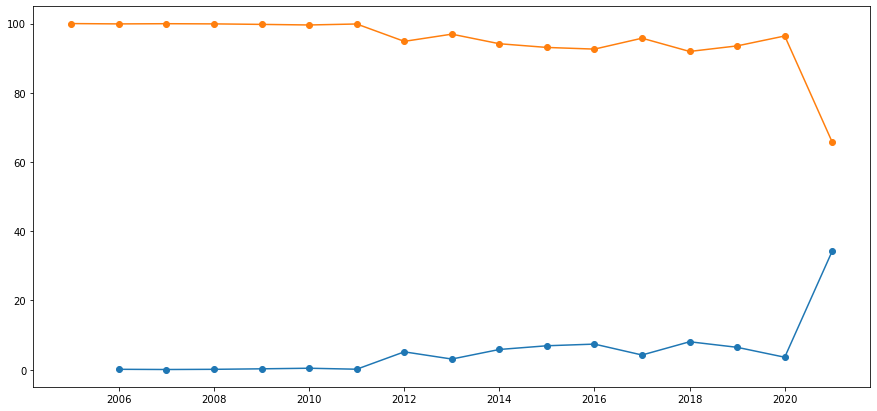

In [67]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.plot(yr_sta_penc.unstack(), marker='o') #plot the % on axis #1

In [68]:
amt_penc = pd.concat([yr_sta, yr_sta_penc], axis=1)
amt_penc.columns = ['LOAN_Count', 'LOAN_Ptg']
amt_penc_fill = amt_penc.add_suffix('_').reset_index()
pd.to_datetime(amt_penc_fill.year_disburse, format='%Y')
amt_penc_fill

,year_disburse,funding_status,LOAN_Count_,LOAN_Ptg_
0,2005.0,1.0,186,100.000000
1,2006.0,0.0,2,0.094473
2,2006.0,1.0,2115,99.905527
3,2007.0,0.0,9,0.037176
4,2007.0,1.0,24200,99.962824
5,2008.0,0.0,49,0.090007
6,2008.0,1.0,54391,99.909993
7,2009.0,0.0,195,0.235260
8,2009.0,1.0,82692,99.764740
9,2010.0,0.0,376,0.403602


## country?

In [11]:
df_19 = df[df['year_disburse']==2019]

In [12]:
cty_sta = df_19.groupby(['COUNTRY_NAME', 'funding_status']).agg({'LOAN_ID': 'count'})
cty = df_19.groupby(['COUNTRY_NAME']).agg({'LOAN_ID': 'count'})
cty_sta_ptg = cty_sta.div(cty, level='COUNTRY_NAME') * 100

In [14]:
cty_sta_ptg_fill = cty_sta_ptg.add_suffix('_').reset_index()
cty_sta_ptg_fill = cty_sta_ptg_fill[cty_sta_ptg_fill['funding_status']==0].reset_index()
del cty_sta_ptg_fill['index']
del cty_sta_ptg_fill['funding_status']
cty_sta_ptg_fill

,COUNTRY_NAME,LOAN_ID_
0,Albania,8.239700
1,Armenia,25.521669
2,Bolivia,9.880565
3,Brazil,9.442060
4,Burkina Faso,0.598802
5,Cambodia,1.651982
6,Cameroon,5.594406
7,Colombia,13.444900
8,Costa Rica,13.840830
9,Dominican Republic,5.912596


Text(0.5, 1.0, 'most underfunded country')

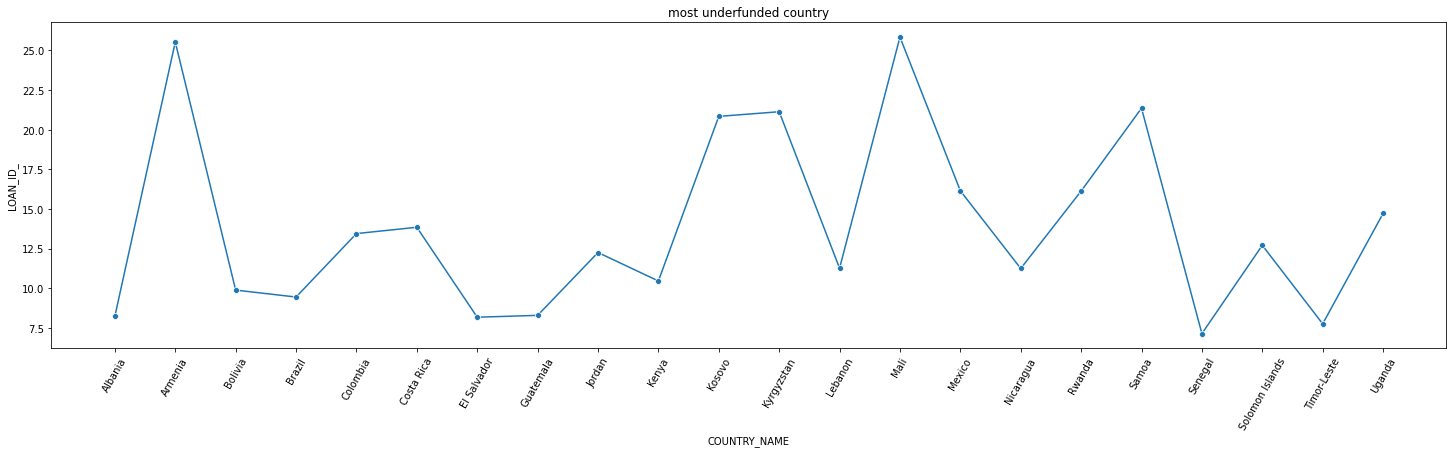

In [15]:
# countries with underfunded ratio > 7% (benchmark)
plt.figure(figsize = (25, 6))
sns.lineplot(x="COUNTRY_NAME", y="LOAN_ID_", data=cty_sta_ptg_fill[cty_sta_ptg_fill['LOAN_ID_']>7], marker='o')
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 45-degrees
plt.title('most underfunded country')

Text(0.5, 1.0, 'Top underfunded country')

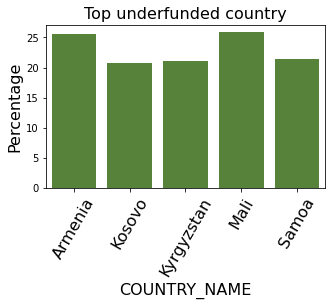

In [42]:
# countries with underfunded ratio > 10% (benchmark)
plt.figure(figsize = (5, 3))
sns.barplot(x="COUNTRY_NAME", y="LOAN_ID_", data=cty_sta_ptg_fill[cty_sta_ptg_fill['LOAN_ID_']>20], color='#558E2E')
plt.xticks(rotation = 60, fontsize=16) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Percentage', fontsize=16)
plt.xlabel('COUNTRY_NAME', fontsize=16)
plt.title('Top underfunded country', fontsize=16)

Text(0.5, 1.0, 'Bottom underfunded country')

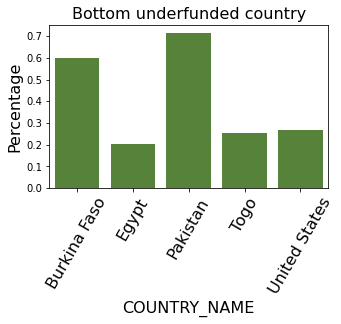

In [45]:
# countries with underfunded ratio > 10% (benchmark)
plt.figure(figsize = (5, 3))
sns.barplot(x="COUNTRY_NAME", y="LOAN_ID_", data=cty_sta_ptg_fill[cty_sta_ptg_fill['LOAN_ID_']<1], color='#558E2E')
plt.xticks(rotation = 60, fontsize=16) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('Percentage', fontsize=16)
plt.xlabel('COUNTRY_NAME', fontsize=16)
plt.title('Bottom underfunded country', fontsize=16)

In [73]:
unf_cty = cty_sta_ptg_fill[cty_sta_ptg_fill['LOAN_ID_']>7].reset_index()
del unf_cty['index']

In [74]:
# join underfunded ratio dataset with count
unf_cty_ratio_count = pd.merge(unf_cty, cty, on='COUNTRY_NAME')

In [75]:
unf_cty_ratio_count.columns = ['COUNTRY_NAME','underfunded_percentage','total_loan_count']
unf_cty_ratio_count.sort_values(by=['underfunded_percentage'], ascending=False)

,COUNTRY_NAME,underfunded_percentage,total_loan_count
13,Mali,25.833333,360
1,Armenia,25.521669,1246
17,Samoa,21.345408,3092
11,Kyrgyzstan,21.127204,3176
10,Kosovo,20.833333,216
14,Mexico,16.142050,1239
16,Rwanda,16.126126,2220
21,Uganda,14.711563,11909
5,Costa Rica,13.840830,867
4,Colombia,13.444900,8784


In [76]:
unf_cty_ratio_count.sort_values(by=['total_loan_count'], ascending=False)

,COUNTRY_NAME,underfunded_percentage,total_loan_count
9,Kenya,10.454432,27969
21,Uganda,14.711563,11909
6,El Salvador,8.170785,9228
4,Colombia,13.444900,8784
12,Lebanon,11.261080,4964
15,Nicaragua,11.242604,3211
11,Kyrgyzstan,21.127204,3176
17,Samoa,21.345408,3092
16,Rwanda,16.126126,2220
20,Timor-Leste,7.753086,2025


## sector?

In [77]:
st_sta = df_19.groupby(['SECTOR_NAME', 'funding_status']).agg({'LOAN_ID': 'count'})
st = df_19.groupby(['SECTOR_NAME']).agg({'LOAN_ID': 'count'})
st_sta_ptg = st_sta.div(st, level='SECTOR_NAME') * 100

st_sta_ptg_fill = st_sta_ptg.add_suffix('_').reset_index()
st_sta_ptg_fill = st_sta_ptg_fill[st_sta_ptg_fill['funding_status']==0].reset_index()
del st_sta_ptg_fill['index']
del st_sta_ptg_fill['funding_status']

Text(0.5, 1.0, 'most underfunded sector')

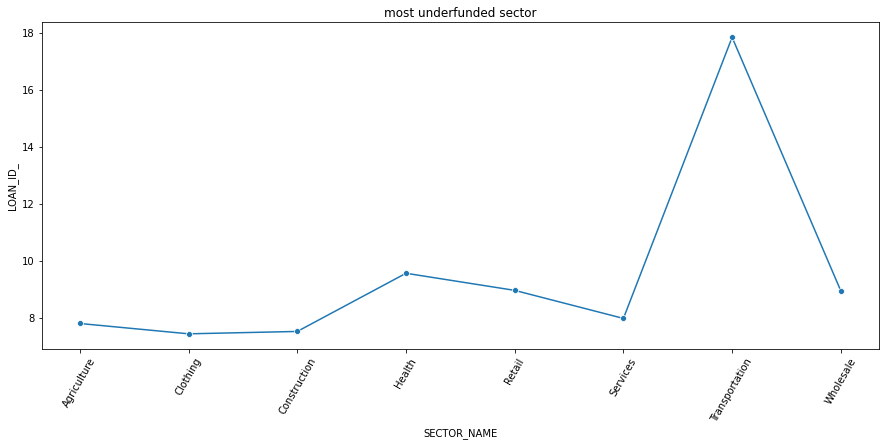

In [78]:
# sectors with underfunded ratio > 7% (benchmark)
plt.figure(figsize = (15, 6))
sns.lineplot(x="SECTOR_NAME", y="LOAN_ID_", data=st_sta_ptg_fill[st_sta_ptg_fill['LOAN_ID_']>7], marker='o')
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 60-degrees
plt.title('most underfunded sector')

In [79]:
unf_st = st_sta_ptg_fill[st_sta_ptg_fill['LOAN_ID_']>7].reset_index()
del unf_st['index']

# join underfunded ratio dataset with lender
unf_st_ratio_count = pd.merge(unf_st, st, on='SECTOR_NAME')

unf_st_ratio_count.columns = ['SECTOR_NAME','underfunded_percentage','total_loan_count']
unf_st_ratio_count.sort_values(by=['underfunded_percentage'], ascending=False)

,SECTOR_NAME,underfunded_percentage,total_loan_count
6,Transportation,17.831625,3219
3,Health,9.559902,4090
4,Retail,8.960214,32901
7,Wholesale,8.943089,123
5,Services,7.976831,12085
0,Agriculture,7.799114,57545
2,Construction,7.520747,1928
1,Clothing,7.437116,10098


In [80]:
unf_st_ratio_count.sort_values(by=['total_loan_count'], ascending=False)

,SECTOR_NAME,underfunded_percentage,total_loan_count
0,Agriculture,7.799114,57545
4,Retail,8.960214,32901
5,Services,7.976831,12085
1,Clothing,7.437116,10098
3,Health,9.559902,4090
6,Transportation,17.831625,3219
2,Construction,7.520747,1928
7,Wholesale,8.943089,123


## Activity

In [82]:
act_sta = df_19.groupby(['ACTIVITY_NAME', 'funding_status']).agg({'LOAN_ID': 'count'})
act = df_19.groupby(['ACTIVITY_NAME']).agg({'LOAN_ID': 'count'})
act_sta_ptg = act_sta.div(act, level='ACTIVITY_NAME') * 100

act_sta_ptg_fill = act_sta_ptg.add_suffix('_').reset_index()
act_sta_ptg_fill = act_sta_ptg_fill[act_sta_ptg_fill['funding_status']==0].reset_index()
del act_sta_ptg_fill['index']
del act_sta_ptg_fill['funding_status']

Text(0.5, 1.0, 'most underfunded activity')

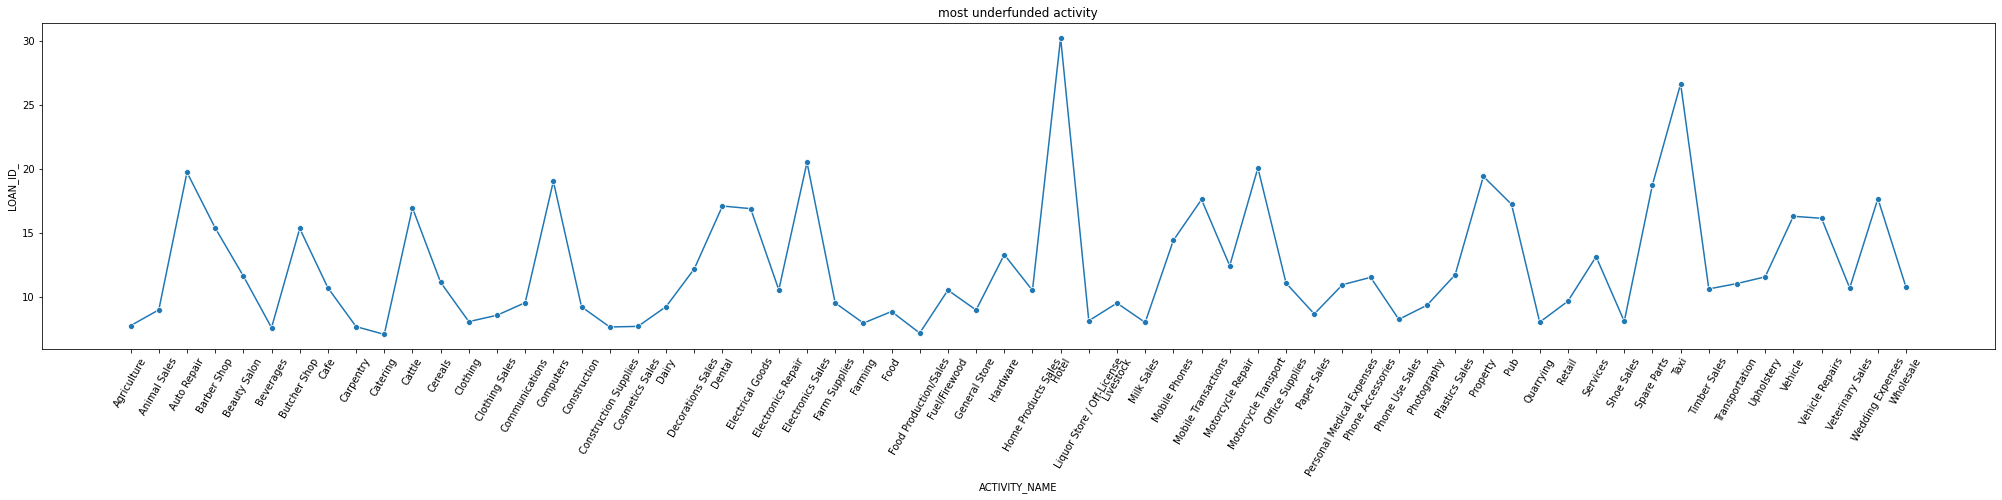

In [83]:
# activites with underfunded ratio > 7% (benchmark)
plt.figure(figsize = (35, 6))
sns.lineplot(x="ACTIVITY_NAME", y="LOAN_ID_", data=act_sta_ptg_fill[act_sta_ptg_fill['LOAN_ID_']>7], marker='o')
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 60-degrees
plt.title('most underfunded activity')

In [84]:
unf_act = act_sta_ptg_fill[act_sta_ptg_fill['LOAN_ID_']>7].reset_index()
del unf_act['index']

# join underfunded ratio dataset with lender
unf_act_ratio_count = pd.merge(unf_act, act, on='ACTIVITY_NAME')

unf_act_ratio_count.columns = ['ACTIVITY_NAME','underfunded_percentage','total_loan_count']
unf_act_ratio_count.sort_values(by=['underfunded_percentage'], ascending=False)

,ACTIVITY_NAME,underfunded_percentage,total_loan_count
33,Hotel,30.208333,192
55,Taxi,26.617375,541
24,Electronics Sales,20.481928,166
40,Motorcycle Transport,20.046083,1736
2,Auto Repair,19.702602,269
...,...,...,...
8,Carpentry,7.650273,183
17,Construction Supplies,7.625272,459
5,Beverages,7.567917,1546
28,Food Production/Sales,7.147527,9178


## language

In [85]:
lang_sta = df_19.groupby(['ORIGINAL_LANGUAGE', 'funding_status']).agg({'LOAN_ID': 'count'})
lang = df_19.groupby(['ORIGINAL_LANGUAGE']).agg({'LOAN_ID': 'count'})
lang_sta_ptg = lang_sta.div(lang, level='ORIGINAL_LANGUAGE') * 100

lang_sta_ptg_fill = lang_sta_ptg.add_suffix('_').reset_index()
lang_sta_ptg_fill = lang_sta_ptg_fill[lang_sta_ptg_fill['funding_status']==0].reset_index()
del lang_sta_ptg_fill['index']
del lang_sta_ptg_fill['funding_status']

Text(0.5, 1.0, 'most underfunded language')

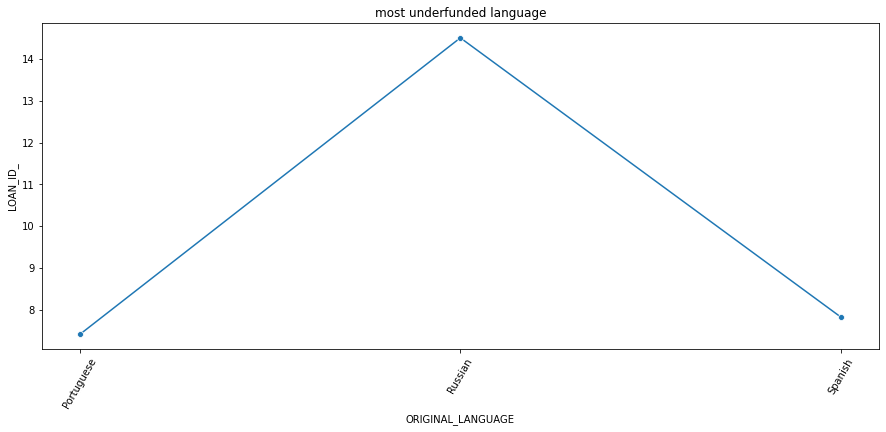

In [86]:
# language with underfunded ratio > 7% (benchmark)
plt.figure(figsize = (15, 6))
sns.lineplot(x="ORIGINAL_LANGUAGE", y="LOAN_ID_", data=lang_sta_ptg_fill[lang_sta_ptg_fill['LOAN_ID_']>7], marker='o')
plt.xticks(rotation = 60) # Rotates X-Axis Ticks by 60-degrees
plt.title('most underfunded language')

In [87]:
unf_lang = lang_sta_ptg_fill[lang_sta_ptg_fill['LOAN_ID_']>7].reset_index()
del unf_lang['index']

# join underfunded ratio dataset with lender
unf_lang_ratio_count = pd.merge(unf_lang, lang, on='ORIGINAL_LANGUAGE')

unf_lang_ratio_count.columns = ['ORIGINAL_LANGUAGE','underfunded_percentage','total_loan_count']
unf_lang_ratio_count.sort_values(by=['underfunded_percentage'], ascending=False)

,ORIGINAL_LANGUAGE,underfunded_percentage,total_loan_count
1,Russian,14.507513,5990
2,Spanish,7.826354,42293
0,Portuguese,7.412310,1511
